In [1]:
# ln -s ../code/analytic.py analytic.py
%matplotlib inline

import numpy as np
import math

import nsfg
import first
import thinkstats2
import thinkplot
import brfss

In [2]:
df = brfss.ReadBrfss(nrows=None)
sample = thinkstats2.SampleRows(df, 5000)
heights,weights = sample.htm3, sample.wtkg2

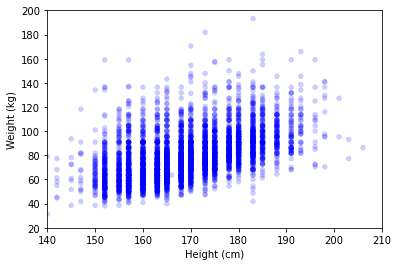

<Figure size 576x432 with 0 Axes>

In [4]:
thinkplot.Scatter(heights, weights, alpha=0.2)
thinkplot.Show(xlabel='Height (cm)', ylabel='Weight (kg)',
               axis=[140,210,20,200])